Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 1
         Function evaluations: 15
         Gradient evaluations: 3


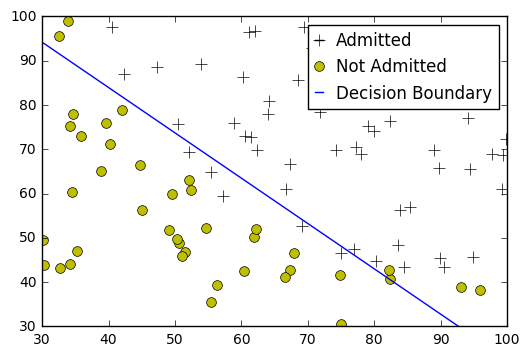

For a student with scores 45 and 85, we predict an admission probability of 0.776291
0.89
Train Accuracy: 89.000000


In [29]:
import numpy as np
from scipy.special import expit
from scipy.optimize import fmin
from scipy.optimize import fmin_bfgs
import matplotlib.pyplot as plt

def sigmoid(z):
    return expit(z)

def costFunction(theta, X, y, return_grad=False):
    m = len(y)
    h = sigmoid(X.dot(theta))
    one = y * np.log(h).T
    two = (1 - y) * np.log(1 - h).T
    J = -(1./m) * (one+two).sum()
    
    grad = (1./m) * np.dot(h.T - y, X).T
    if return_grad == True:
        return J, np.transpose(grad)
    elif return_grad == False:
        return J

def plotData(X, y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    
    p1 = plt.plot(X[pos,0], X[pos,1], marker='+', markersize=9, color='k')[0]
    p2 = plt.plot(X[neg,0], X[neg,1], marker='o', markersize=7, color='y')[0]
    return p1, p2

def plotDecisionBoundary(theta, X, y):
    p1, p2 = plotData(X[:,1:3], y)
    plt.hold(True)
    if X.shape[1] <= 3:
        plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        p3 = plt.plot(plot_x, plot_y)
        
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3[0]), ('Admitted', 'Not Admitted', 'Decision Boundary'), numpoints=1, handlelength=0.5)

        plt.axis([30, 100, 30, 100])

        plt.show(block=False)

        
def predict(theta, X):
    sigValue = sigmoid( np.dot(X,theta) )
    p = sigValue >= 0.5

    return p
    
# load labled training set to build model
data = np.loadtxt('ex2data1.txt', delimiter=',')

X = data[:,:2]
y = data[:, 2]

m, n = X.shape

X_padded = np.column_stack((np.ones((m, 1)), X))

initial_theta = np.zeros(shape=(n + 1, 1))

J, grad = costFunction(initial_theta, X_padded, y, return_grad=True)

myargs = (X_padded, y)
theta = fmin(costFunction, x0=initial_theta, args=myargs)
theta, cost_at_theta, _, _, _, _, _ = fmin_bfgs(costFunction, x0=theta, args=myargs, full_output=True)

plotDecisionBoundary(theta, X_padded, y)

prob = sigmoid(np.dot(np.array([1,45,85]),theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X_padded)
print('Train Accuracy: {:f}'.format(np.mean(p == y) * 100))